<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/MLP_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural MLP com Keras
## Exemplo simples de regressão

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2


print(tf.__version__)

2.8.2


## Dataset

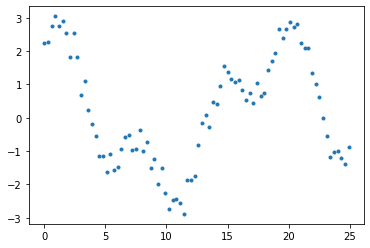

number of samples 84


In [ ]:
x = np.arange(0, 8.0*math.pi,0.3)
y = 2.0*np.cos(x/3) + np.sin(x) + (x*0.0) + np.random.normal(0, 0.3, len(x))
plt.plot(x,y, '.')
plt.show()
print("number of samples", len(y))

25
59


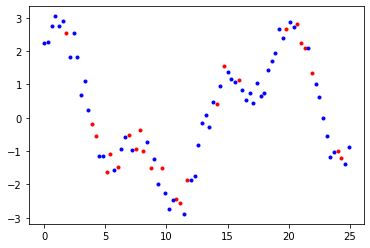

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)
print(len(x_train))
print(len(x_test))

plt.plot(x_train, y_train, '.', color='red')
plt.plot(x_test, y_test, '.', color='blue')
plt.show()


## Modelo 1

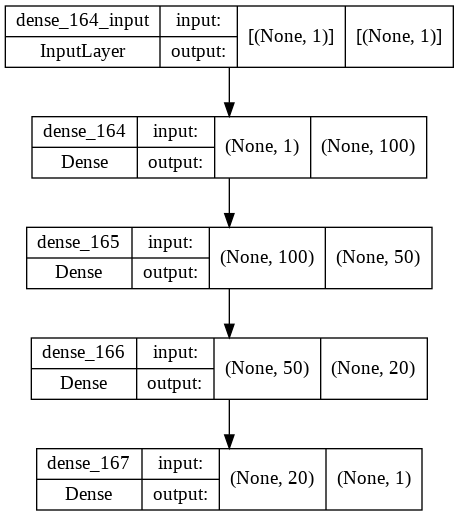

In [ ]:
fl2 = 0.0
drop = 0.2

# model = keras.Sequential()
# model.add(keras.layers.Dense(units=100, kernel_regularizer=l2(fl2), input_shape=[1], activation="tanh"))
# model.add(Dropout(drop))
# model.add(keras.layers.Dense(units=50, kernel_regularizer=l2(fl2), activation="tanh"))
# model.add(Dropout(drop))
# model.add(keras.layers.Dense(units=20, kernel_regularizer=l2(fl2), activation="tanh"))
# model.add(keras.layers.Dense(units=20, kernel_regularizer=l2(fl2), activation="tanh"))
# model.add(keras.layers.Dense(units=1, activation="linear"))

model = keras.Sequential()
model.add(keras.layers.Dense(units=100, input_shape=[1], activation="tanh"))
model.add(keras.layers.Dense(units=50, activation="tanh"))
model.add(keras.layers.Dense(units=20, activation="tanh"))
model.add(keras.layers.Dense(units=1, activation="linear"))


sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
adam = tf.keras.optimizers.Adam()

model.compile(loss='mean_squared_error', optimizer=adam, metrics=["mean_absolute_error"])

tf.keras.utils.plot_model(model, show_shapes=True)


## Treino

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

history = model.fit(x_train, y_train, epochs=3000, batch_size=10, 
                    validation_split=0.2, 
                    verbose=False)#, 
                    #callbacks=[early])

# print("Network parameters: {}".format(model.get_weights()))



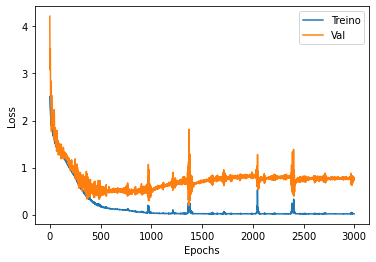

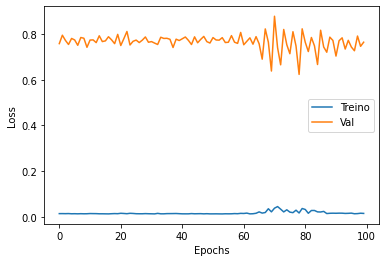

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'][-100:], label="Treino")
plt.plot(history.history['val_loss'][-100:], label="Val")
plt.legend()
plt.show()



# Avaliação (teste)

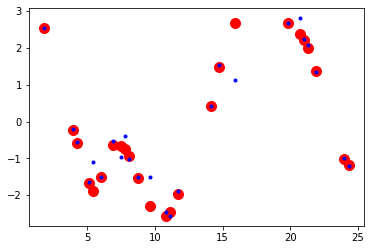

In [ ]:
y_rest = model.predict(x_train)
plt.plot(x_train, y_rest, '.', markersize=20 ,color='red')
plt.plot(x_train, y_train, '.', color='blue')
plt.show()


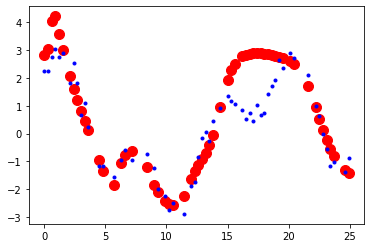

2/2 [==============================] - 0s 5ms/step - loss: 0.8706 - mean_absolute_error: 0.6646


In [ ]:
y_res = model.predict(x_test)
plt.plot(x_test, y_res, '.', markersize=20, color='red')
plt.plot(x_test, y_test, '.', color='blue')
plt.show()

test_loss = model.evaluate(x_test, y_test)

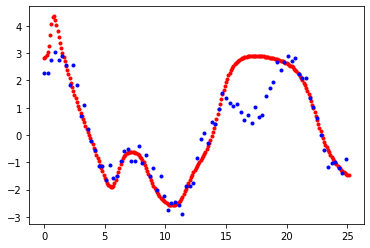

In [ ]:
xn = np.arange(0, 8.0*math.pi,0.1)
yn = model.predict(xn)
plt.plot(xn, yn, '.', color='red')
plt.plot(x, y, '.', color='blue')
plt.show()



In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test metric:", score[1])

Test loss: 0.5340995192527771
Test metric: 0.5007112622261047


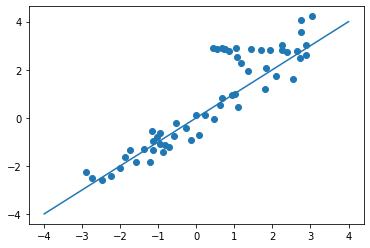

In [ ]:
plt.scatter(y_test, y_res)
plt.plot([-4,4], [-4,4])
plt.show()

## Keras Functional